In [2]:
import polars as pl 
import plotnine as pn
import pandas as pd
from mizani.formatters import percent_format

In [3]:
df = pl.read_parquet('english_only.parquet')

In [5]:
df.head()

game,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,review,timestamp_created,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase
str,i64,i64,i64,i64,i64,i64,str,datetime[ms],i64,i64,i64,f64,i64,i64
"""Counter-Strike""",76561198363716821,0,2,197,41,197,"""GOAT Game !!""",2023-10-26 14:10:19,1,0,0,0.0,0,1
"""Counter-Strike""",76561198134752176,69,1,12107,0,12107,"""First crush. Always in my hear…",2023-10-26 07:41:36,1,0,0,0.0,0,0
"""Counter-Strike""",76561197985437504,0,5,42519,3,42515,"""best version of cs ever, histo…",2023-10-26 07:32:49,1,0,0,0.0,0,0
"""Counter-Strike""",76561199015747395,71,34,30,0,30,"""a game everyone needs, but not…",2023-10-25 18:11:55,1,0,0,0.0,0,1
"""Counter-Strike""",76561199479067349,5,6,209,200,209,"""old but gold""",2023-10-25 17:03:14,1,1,0,0.52381,0,1


In [6]:
most_popular = df.group_by('game', maintain_order=True).agg(pl.count().alias('count')).sort('count', descending=True) 

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1888\2749993104.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.


In [7]:
most_popular_pd = most_popular.head(10).to_pandas().sort_values(by='count')
most_popular_pd['game'] = pd.Categorical(most_popular_pd['game'], 
                                         categories=most_popular_pd['game']
                                         )

In [8]:
most_popular_pd

,game,count
9,ELDEN RING,369863
8,PUBG: BATTLEGROUNDS,375603
7,Among Us,386928
6,Garry's Mod,495568
5,Rust,496714
4,Grand Theft Auto V,506114
3,Tom Clancy's Rainbow Six Siege,541013
2,Team Fortress 2,576588
1,Terraria,595616
0,Counter-Strike 2,2057696


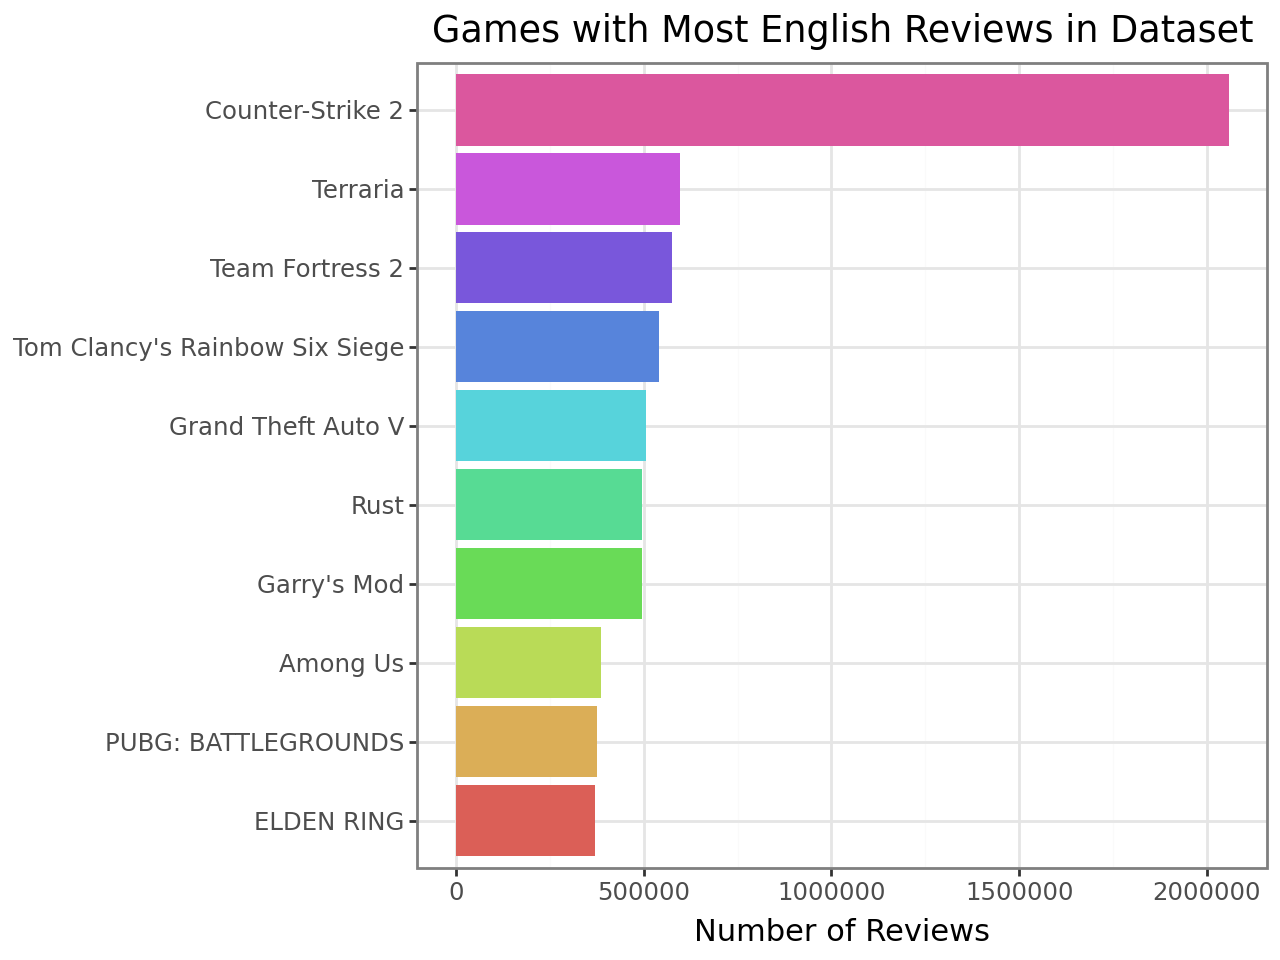

In [10]:
# games with most english reviews bar graph
(
    pn.ggplot(most_popular_pd, pn.aes('game', 'count', fill='game'))
    + pn.geom_bar(stat='identity') 
    + pn.coord_flip()
    + pn.labs(x='', y='Number of Reviews', title='Games with Most English Reviews in Dataset') 
    + pn.theme_bw()
    + pn.theme()
    + pn.guides(fill = False)
)

In [11]:
top10 = most_popular_pd['game'].to_numpy() 
voted_pos = df.filter(pl.col('game').is_in(top10)).group_by('game').agg((pl.col('voted_up').sum()/pl.count()).alias('prop_voted_pos'))

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1888\3792383779.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.


In [12]:
voted_pos

game,prop_voted_pos
str,f64
"""Among Us""",0.918546
"""Garry's Mod""",0.968503
"""Counter-Strike 2""",0.886543
"""ELDEN RING""",0.92982
"""PUBG: BATTLEGROUNDS""",0.648589
"""Grand Theft Auto V""",0.816701
"""Terraria""",0.978001
"""Team Fortress 2""",0.940528
"""Rust""",0.870839


In [13]:
voted_pos_pd = voted_pos.to_pandas() 
voted_pos_pd['game'] = pd.Categorical(voted_pos_pd['game'], categories=top10)

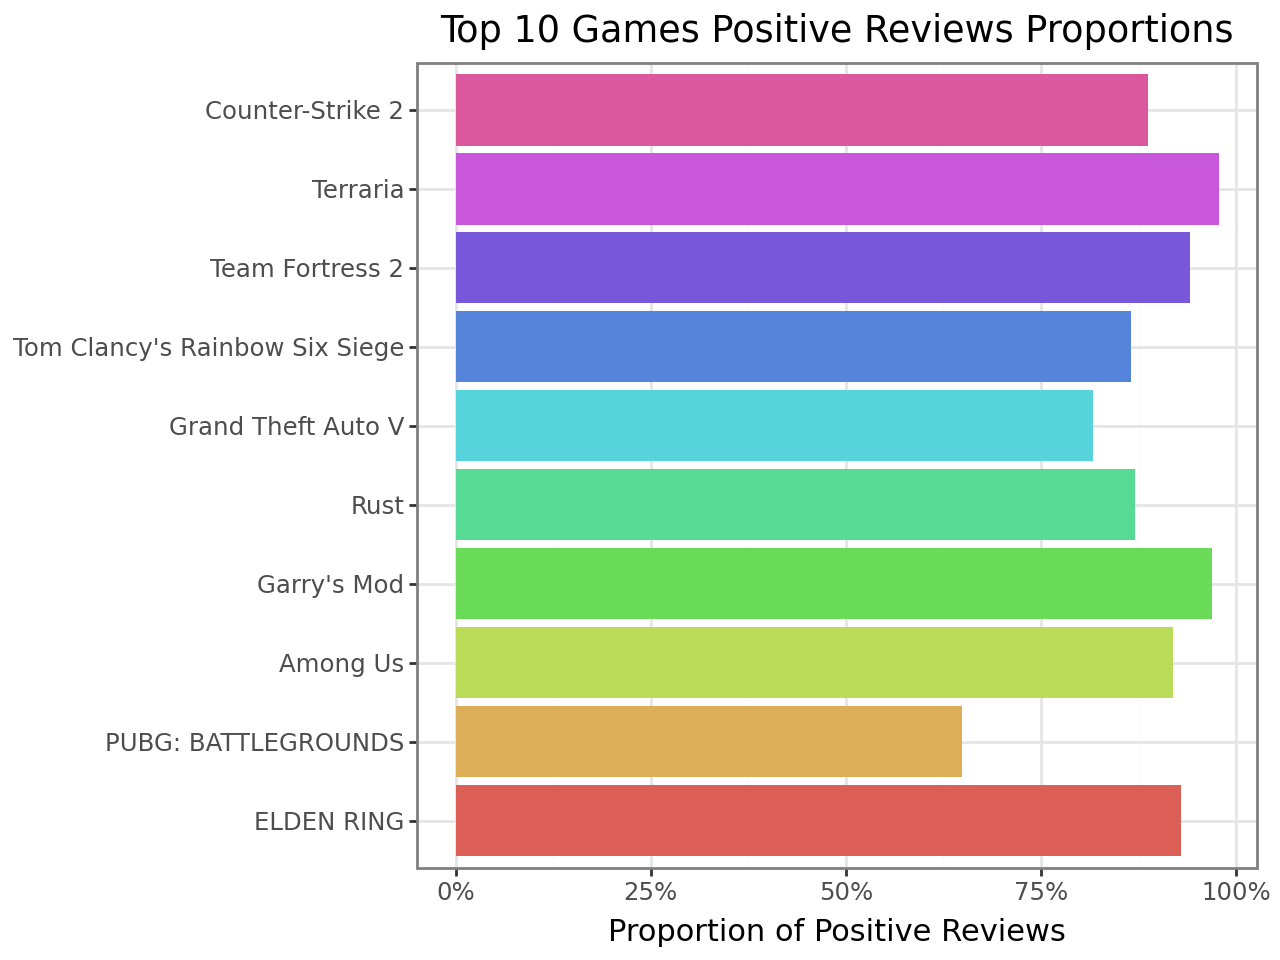

In [14]:
# bargraph of positive review proportions 
(
    pn.ggplot(voted_pos_pd, pn.aes('game', 'prop_voted_pos', fill='game'))
    + pn.geom_bar(stat='identity') 
    + pn.coord_flip()
    + pn.scale_y_continuous(labels=percent_format())
    + pn.labs(x='', y='Proportion of Positive Reviews', title='Top 10 Games Positive Reviews Proportions') 
    + pn.theme_bw()
    + pn.theme()
    + pn.guides(fill = False)
)

In [100]:
length_dists = df.filter(pl.col('game').is_in(top10)).with_columns(pl.col('review').str.len_chars().alias('review_length'), pl.col('voted_up').cast(pl.Utf8)).select(['game', 'review_length', 'voted_up'])

In [102]:
length_dists_pd = length_dists.to_pandas()
length_dists_pd['game'] = pd.Categorical(length_dists_pd['game'], categories=top10)

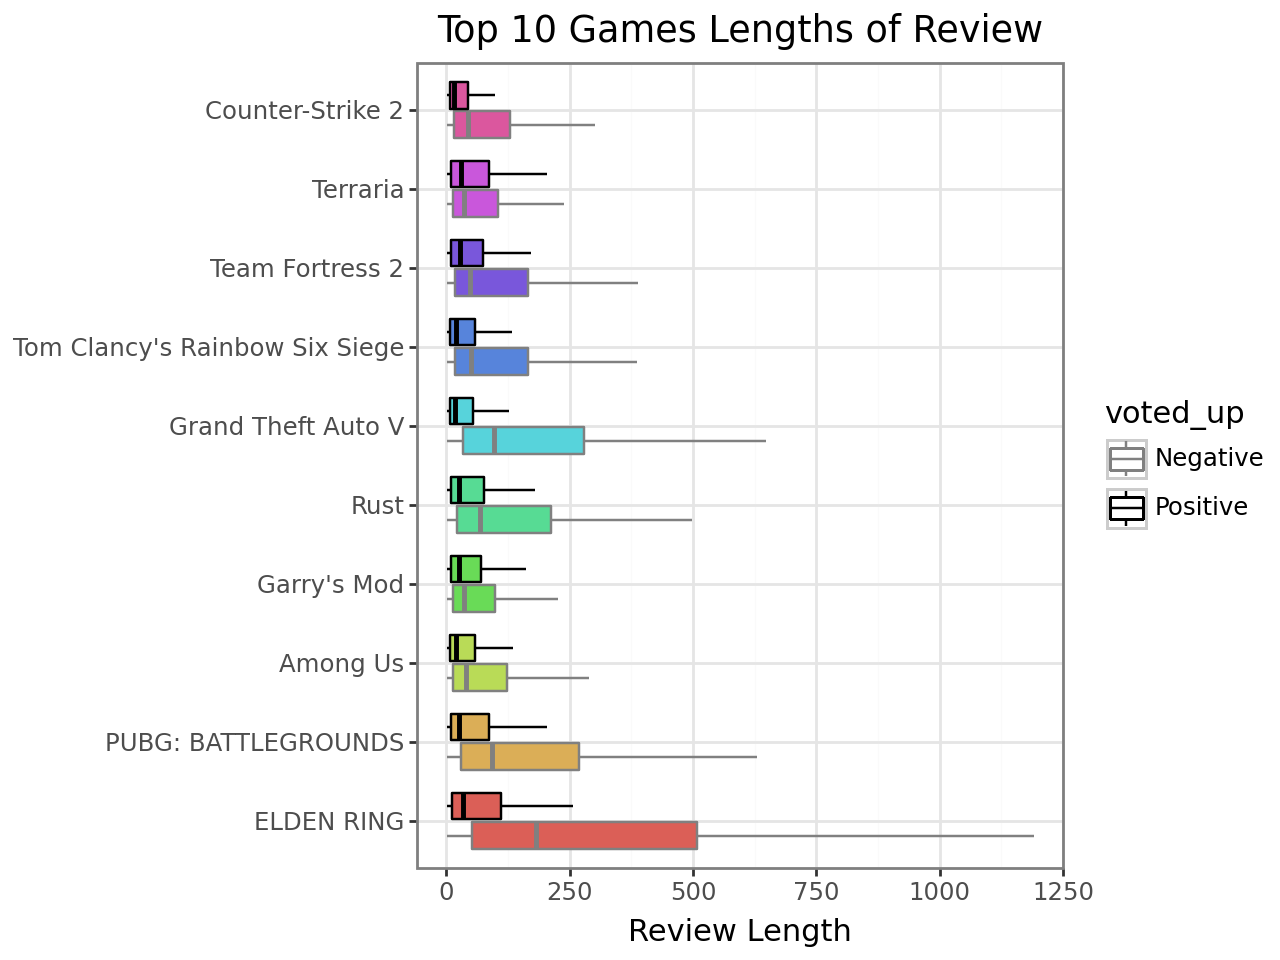

In [ ]:
# boxplots of review lengths 
(
    pn.ggplot(length_dists_pd, pn.aes('game', 'review_length', fill='game', color='voted_up'))
    + pn.geom_boxplot(outlier_shape = None) 
    + pn.coord_flip()
    + pn.scale_color_manual(values={'0': 'gray', '1': 'black'}, 
                            labels={'0': 'Negative', '1': 'Positive'})
    + pn.labs(x='', y='Review Length', title='Top 10 Games Lengths of Review') 
    + pn.theme_bw()
    + pn.guides(fill = False)
)